In [1]:
import numpy        # Module with useful arithmetic and linear algebra and array manipulation
import pandas       # Module to process panel data (like spreadsheets)
import statistics   # Statistics module
import scipy.stats  # Another statistics module

import requests     # Module to process http/https requests

In [2]:
remote_url="http://54.243.252.9/ce-5319-webroot/ce5319jb/lessons/lesson8/HighestGrossingMovies.csv"  # set the url
response = requests.get(remote_url, allow_redirects=True)                                            # get the remote resource, follow imbedded links
open('HighestGrossingMovies.csv','wb').write(response.content);                                      # extract from the remote the contents, assign to a local file same name

In [3]:
Movies = pandas.read_csv("HighestGrossingMovies.csv")    
Budget = Movies['Budget_million$']
print("Mean Budget $",Budget.mean()," million USD")

Mean Budget $ 115.66  million USD


In [4]:
print("Mean Budget $",numpy.mean(Budget)," million USD") # using numpy

Mean Budget $ 115.66  million USD


In [5]:
print("Mean Budget $",statistics.mean(Budget)," million USD") # using statistics package

Mean Budget $ 115.66  million USD


In [6]:
print("Mean Budget $",scipy.stats.describe(Budget)[2]," million USD") # using scipy.stats package - a bit weird because describe returns a tuple, and the mean is the 3-rd item

Mean Budget $ 115.66  million USD


In [7]:
print("Harmonic Mean Budget $ ",round(statistics.harmonic_mean(Budget),2),"million USD") # via the Statistics library:

Harmonic Mean Budget $  13.38 million USD


In [8]:
print("Harmonic Mean Budget ",round(scipy.stats.hmean(Budget),2),"million USD") # via the scipy.stats library:

Harmonic Mean Budget  13.38 million USD


In [9]:
print("Geometric Mean Budget $ ",round(statistics.geometric_mean(Budget),2),"million USD") # via the Statistics library:

Geometric Mean Budget $  34.96 million USD


In [10]:
print("Geometric Mean Budget ",round(scipy.stats.gmean(Budget),2),"million USD") # via the scipy.stats library:

Geometric Mean Budget  34.96 million USD


In [11]:
Gross = Movies['Gross_million$']

In [12]:
print("The median of gross of the Top10 highest-grossing films is ",Gross.median(),"million USD") #via the Pandas library:
print("The median of gross of the Top10 highest-grossing films is ",numpy.median(Gross),"million USD") #via the Numpy library:
print("The median of gross of the Top10 highest-grossing films is ",statistics.median(Gross),"million USD") #via the Statistics library:
print("        low median :",statistics.median_low(Gross),"million USD")
print("       high median :",statistics.median_high(Gross),"million USD")

The median of gross of the Top10 highest-grossing films is  2673.5 million USD
The median of gross of the Top10 highest-grossing films is  2673.5 million USD
The median of gross of the Top10 highest-grossing films is  2673.5 million USD
        low median : 2549 million USD
       high median : 2798 million USD


In [13]:
newgross = [99999,3257,3081,3043,2798,2549,2489,2356,2233,2202] #We have replaced 3706 with 99999- an extremely high number (an outlier)
newmean = numpy.mean(newgross)
newmedian = numpy.median(newgross)
print(newmean)   #A huge change from the previous value (115.66) - Mean is very sensitive to outliers and extreme values
print(newmedian) #No Change- the median only depends on outliers either slightly or not at all. 

12400.7
2673.5


In [14]:
# In primitive Python:
# Create a list of all the numbers:
gross = [3706,3257,3081,3043,2798,2549,2489,2356,2233,2202]
mode1 = max((gross.count(item), item) for item in gross)[1]
print(mode1) #Since each item is repeated only once, only the first element is printed- This is a multimodal set. 

#via the Pandas library:
Gross = Movies['Gross_million$']
mode2 = Gross.mode()
print(mode2) #Returns all modal values- This is a multimodal set. 

#via the Statistics library:
Gross = Movies['Gross_million$']
mode3 = statistics.mode(Gross)
print(mode3) #Return a single value
mode4 = statistics.multimode(Gross)
print(mode4) #Returns a list of all modes

#via the scipy.stats library:
Gross = Movies['Gross_million$']
mode5 = scipy.stats.mode(Gross)
print(mode5) #Returns the object with the modal value and the number of times it occurs- If multimodal: only the smallest value

3706
0    2202
1    2233
2    2356
3    2489
4    2549
5    2798
6    3043
7    3081
8    3257
9    3706
Name: Gross_million$, dtype: int64
3706
[3706, 3257, 3081, 3043, 2798, 2549, 2489, 2356, 2233, 2202]
ModeResult(mode=np.int64(2202), count=np.int64(1))


In [15]:
Director = Movies['Director']
# via statistics:
mode6 = statistics.mode(Director)
print(mode6) #"James Cameron" with two films (x2 repeats) is the mode
# via pandas:
mode7 = Director.mode()
print(mode7) #"James Cameron" with two films (x2 repeats) is the mode

James Cameron
0    James Cameron
Name: Director, dtype: object


In [16]:
# Primitive Python:
budget = [3.9,237,200,11,356,8.2,10.5,13,11,306]
range1 = max(budget)-min(budget)
print("The range of the budget of the Top10 highest-grossing films is ",range1,"million USD")

# via the Statistics library:
Budget = Movies['Budget_million$']
range2 = numpy.ptp(Budget) #ptp stands for Peak To Peak
print("The range of the budget of the Top10 highest-grossing films is ",range2,"million USD")

The range of the budget of the Top10 highest-grossing films is  352.1 million USD
The range of the budget of the Top10 highest-grossing films is  352.1 million USD


In [17]:
Budget = Movies['Budget_million$']
#via Numpy:
p10 = numpy.percentile(Budget, 10) #returns the 10th percentile
print("The 10th percentile of the budget of the Top10 highest-grossing films is ",p10)
p4070 = numpy.percentile(Budget, [40,70]) #returns the 40th and 70th percentile
print("The 40th and 70th percentile of the budget of the Top10 highest-grossing films are ",p4070)
#via Pandas:
p10n = Budget.quantile(0.10) #returns the 10th percentile - notice the difference from Numpy
print("The 10th percentile of the budget of the Top10 highest-grossing films is ",p10n)
#via Statistics:
Qs = statistics.quantiles(Budget, n=4, method='inclusive')     #The parameter n defines the number of resulting equal-probability percentiles: 
                                                               #n=4 returns the quartiles | n=2 returns the median
print("The quartiles of the budget of the Top10 highest-grossing films is ",Qs)

The 10th percentile of the budget of the Top10 highest-grossing films is  7.77
The 40th and 70th percentile of the budget of the Top10 highest-grossing films are  [ 11.  211.1]
The 10th percentile of the budget of the Top10 highest-grossing films is  7.77
The quartiles of the budget of the Top10 highest-grossing films is  [10.625, 12.0, 227.75]


In [18]:
Budget = Movies['Budget_million$']
#via Numpy:
IQR1 = numpy.percentile(Budget, 75) - numpy.percentile(Budget, 25)    #returns the IQR = Q3-Q1 = P75-P25
print("The IQR of the budget of the Top10 highest-grossing films is ",IQR1)
#via scipy.stats:
IQR2 = scipy.stats.iqr(Budget)    #returns the IQR- Can be used for other percentile differences as well >> iqr(object, rng=(p1, p2))
print("The IQR of the budget of the Top10 highest-grossing films is ",IQR2)

The IQR of the budget of the Top10 highest-grossing films is  217.125
The IQR of the budget of the Top10 highest-grossing films is  217.125


In [19]:
Budget = Movies['Budget_million$']
Budget.describe()     #Remember this jewel from Pandas? -It directly return the 5-number summary AND MORE!

count     10.000000
mean     115.660000
std      142.739991
min        3.900000
25%       10.625000
50%       12.000000
75%      227.750000
max      356.000000
Name: Budget_million$, dtype: float64

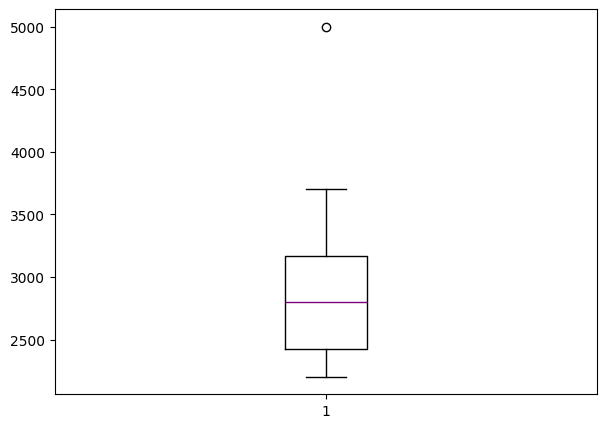

In [20]:
import matplotlib.pyplot as plt  #Required for the plot

gross = [3706,3257,3081,3043,2798,2549,2489,2356,2233,2202,5000] #same data + an outlier: 5000

fig = plt.figure(figsize =(7, 5))
plt.boxplot(gross,medianprops={'linewidth': 1, 'color': 'purple'})

plt.show()

In [21]:
# Primitive Python:
budget = [3.9,237,200,11,356,8.2,10.5,13,11,306]
n = len(budget)
mean = sum(budget) / n
var1 = sum((item - mean)**2 for item in budget) / (n - 1)
print("The variance of the budget of the Top10 highest-grossing films is ",var1)

# via the Statistics library:
Budget = Movies['Budget_million$']
var2 = statistics.variance(Budget)
print("The variance of the budget of the Top10 highest-grossing films is ",var2)

The variance of the budget of the Top10 highest-grossing films is  20374.70488888889
The variance of the budget of the Top10 highest-grossing films is  20374.70488888889


In [22]:
# Primitive Python:
budget = [3.9,237,200,11,356,8.2,10.5,13,11,306]
n = len(budget)
mean = sum(budget) / n
var = sum((item - mean)**2 for item in budget) / (n - 1)
sd1 = var**0.5
print("The standard deviation of the budget of the Top10 highest-grossing films is ",sd1,"million USD")

# via the Statistics library:
Budget = Movies['Budget_million$']
sd2 = statistics.stdev(Budget)
print("The standard deviation of the budget of the Top10 highest-grossing films is ",sd2,"million USD")

The standard deviation of the budget of the Top10 highest-grossing films is  142.73999050332353 million USD
The standard deviation of the budget of the Top10 highest-grossing films is  142.73999050332353 million USD


In [23]:
# Primitive Python:
budget = [3.9,237,200,11,356,8.2,10.5,13,11,306]
n = len(budget)
mean = sum(budget) / n
var = sum((item - mean)**2 for item in budget) / (n - 1)
std = var**0.5
skew1 = (sum((item - mean)**3 for item in budget)
         * n / ((n - 1) * (n - 2) * std**3))
print("The skewness of the budget of the Top10 highest-grossing films is ",skew1)

# via the scipy.stats library:
Budget = Movies['Budget_million$']
skew2 = scipy.stats.skew(Budget, bias=False)
print("The skewness of the budget of the Top10 highest-grossing films is ",skew2)

# via the Pandas library:
Budget = Movies['Budget_million$']
skew3 = Budget.skew()
print("The skewness of the budget of the Top10 highest-grossing films is ",skew3)

The skewness of the budget of the Top10 highest-grossing films is  0.7636547490528159
The skewness of the budget of the Top10 highest-grossing films is  0.763654749052816
The skewness of the budget of the Top10 highest-grossing films is  0.763654749052816


In [24]:
# via the scipy.stats library:
Budget = Movies['Budget_million$']
Kurt = scipy.stats.kurtosis(Budget)
print("The kurtosis of the budget of the Top10 highest-grossing films is ",Kurt) #a platykurtic distribution | the tails are heavy

The kurtosis of the budget of the Top10 highest-grossing films is  -1.3110307923262225


In [25]:
#Get database -- use the Get Data From URL Script
#Step 1: import needed modules to interact with the internet
import requests
#Step 2: make the connection to the remote file (actually its implementing "bash curl -O http://fqdn/path ...")
remote_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls' # an Excel file
response = requests.get(remote_url) # Gets the file contents puts into an object
output = open('concreteData.xls', 'wb') # Prepare a destination, local
output.write(response.content) # write contents of object to named local file
output.close() # close the connection

In [26]:
# The usual suspects plus some newish ones!
### Import/install support packages
import numpy as np
import pandas
import matplotlib.pyplot as plt
import seaborn 
#%matplotlib inline

In [27]:
data = pandas.read_excel("concreteData.xls")

In [28]:
print("How many rows :",len(data))

How many rows : 1030


In [29]:
data.tail() # head is a pandas method that becomes accessible when the dataframe is created with the read above

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.401235


In [30]:
req_col_names = ["Cement", "BlastFurnaceSlag", "FlyAsh", "Water", "Superplasticizer",
                 "CoarseAggregate", "FineAggregate", "Age", "CC_Strength"]
curr_col_names = list(data.columns)

mapper = {}
for i, name in enumerate(curr_col_names):
    mapper[name] = req_col_names[i]

data = data.rename(columns=mapper)

data.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CC_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [31]:
data.isna().sum() # isna() and sum() are pandas methods that become accessible when the dataframe is created with the read above

Cement              0
BlastFurnaceSlag    0
FlyAsh              0
Water               0
Superplasticizer    0
CoarseAggregate     0
FineAggregate       0
Age                 0
CC_Strength         0
dtype: int64

In [32]:
data.describe() # describe is a pandas method that becomes accessible when the dataframe is created with the read above

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CC_Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


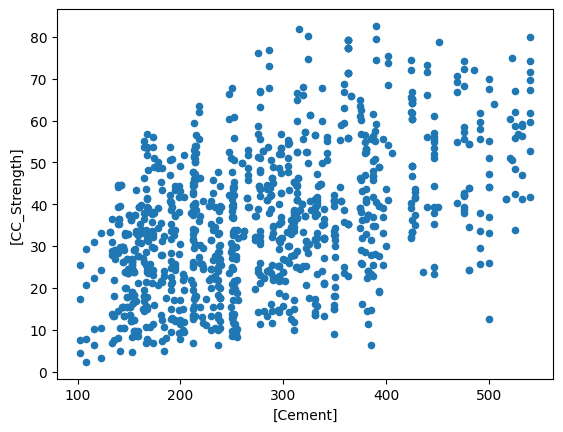

In [33]:
data.plot.scatter(x=['Cement'],y=['CC_Strength']); # some plotting methods come with pandas dataframes

<Axes: xlabel='[CoarseAggregate]', ylabel='[CC_Strength]'>

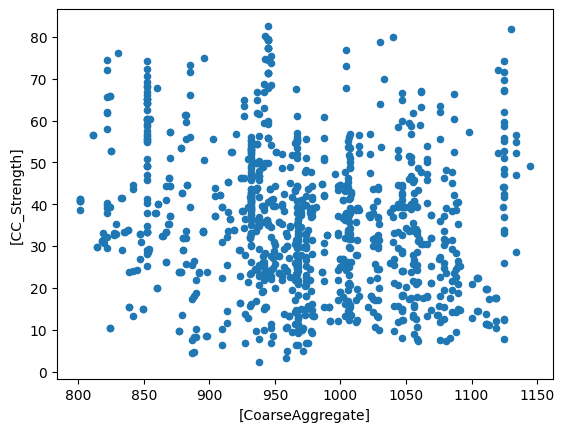

In [34]:
data.plot.scatter(x=['CoarseAggregate'],y=['CC_Strength']) # some plotting methods come with pandas dataframes

<Axes: xlabel='[Water]', ylabel='[CC_Strength]'>

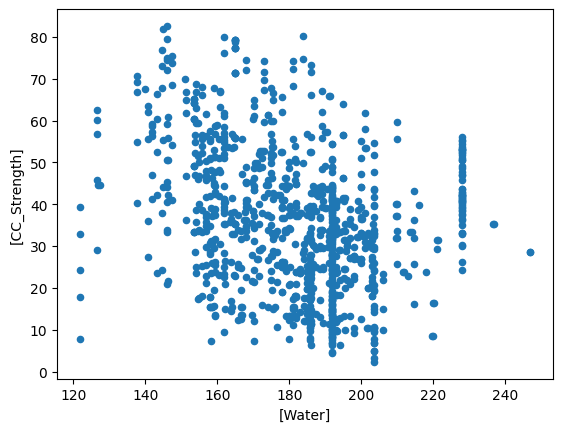

In [35]:
data.plot.scatter(x=['Water'],y=['CC_Strength']) # some plotting methods come with pandas dataframes

In [36]:
data.corr() # corr (Pearson's correlation coefficient) is a pandas method that becomes accessible when the dataframe is created with the read above

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CC_Strength
Cement,1.000000,-0.275193,-0.397475,-0.081544,0.092771,-0.109356,-0.222720,0.081947,0.497833
BlastFurnaceSlag,-0.275193,1.000000,-0.323569,0.107286,0.043376,-0.283998,-0.281593,-0.044246,0.134824
FlyAsh,-0.397475,-0.323569,1.000000,-0.257044,0.377340,-0.009977,0.079076,-0.154370,-0.105753
Water,-0.081544,0.107286,-0.257044,1.000000,-0.657464,-0.182312,-0.450635,0.277604,-0.289613
Superplasticizer,0.092771,0.043376,0.377340,-0.657464,1.000000,-0.266303,0.222501,-0.192717,0.366102
CoarseAggregate,-0.109356,-0.283998,-0.009977,-0.182312,-0.266303,1.000000,-0.178506,-0.003016,-0.164928
FineAggregate,-0.222720,-0.281593,0.079076,-0.450635,0.222501,-0.178506,1.000000,-0.156094,-0.167249
Age,0.081947,-0.044246,-0.154370,0.277604,-0.192717,-0.003016,-0.156094,1.000000,0.328877
CC_Strength,0.497833,0.134824,-0.105753,-0.289613,0.366102,-0.164928,-0.167249,0.328877,1.000000


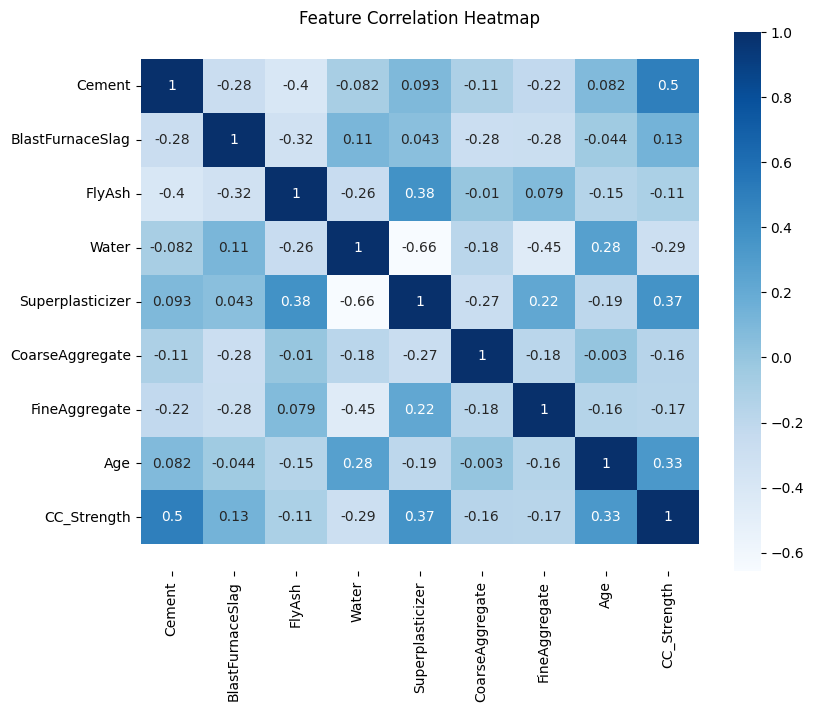

In [37]:
corr = data.corr()
plt.figure(figsize=(9,7))
seaborn.heatmap(corr, annot=True, cmap='Blues')
b, t = plt.ylim()
plt.ylim(b+0.5, t-0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

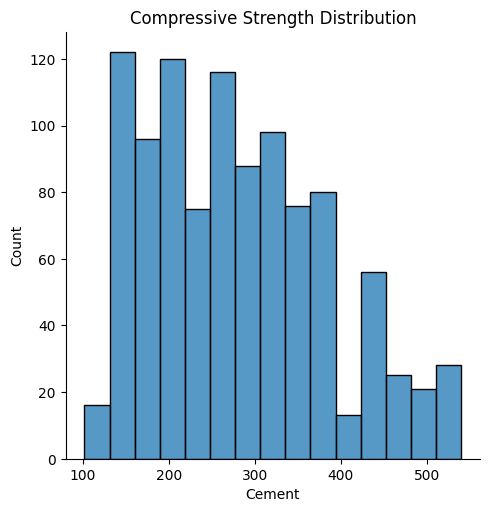

In [38]:
#ax = seaborn.distplot(data.Cement); deprecated function
#ax.set_title("Compressive Strength Distribution"); deprecated function
ax = seaborn.displot(data.Cement)
plt.title("Compressive Strength Distribution")
plt.show()

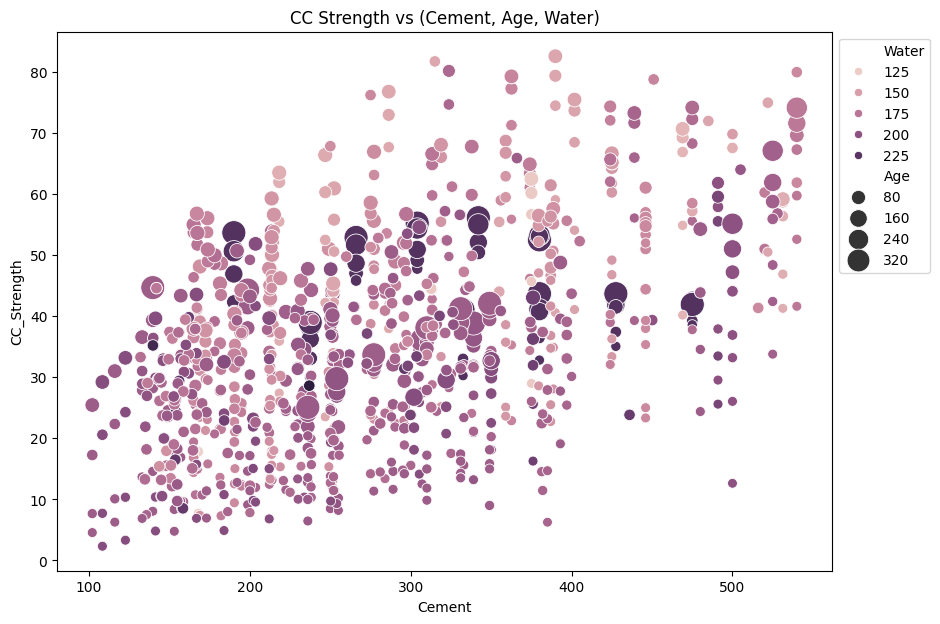

In [39]:
fig, ax = plt.subplots(figsize=(10,7))
seaborn.scatterplot(y="CC_Strength", x="Cement", hue="Water", size="Age", data=data, ax=ax, sizes=(50, 300))
ax.set_title("CC Strength vs (Cement, Age, Water)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

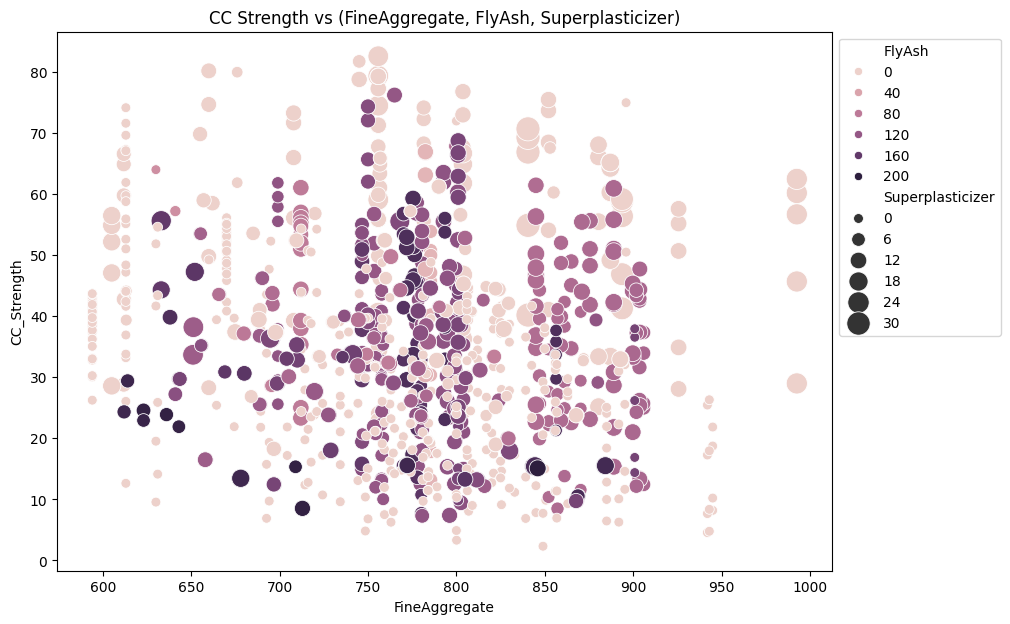

In [40]:
fig, ax = plt.subplots(figsize=(10,7))
seaborn.scatterplot(y="CC_Strength", x="FineAggregate", hue="FlyAsh",
   size="Superplasticizer", data=data, ax=ax, sizes=(50, 300))
ax.set_title("CC Strength vs (FineAggregate, FlyAsh, Superplasticizer)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()


In [41]:
# code example

In [42]:
#Step 1: import needed modules to interact with the internet
import requests
#Step 2: make the connection to the remote file (actually its implementing "bash curl -O http://fqdn/path ...")
remote_url="http://54.243.252.9/ce-5319-webroot/ce5319jb/lessons/lesson8/pip-corner-sumps.txt"  # set the url
response = requests.get(remote_url, allow_redirects=True)     
#Step 3: read the file and store a copy locally
open('pip-corner-sumps.txt','wb').write(response.content);# extract from the remote the contents, assign to a local file same name

Text(0.5, 1.0, 'Contour Plot from Gridded Data File')

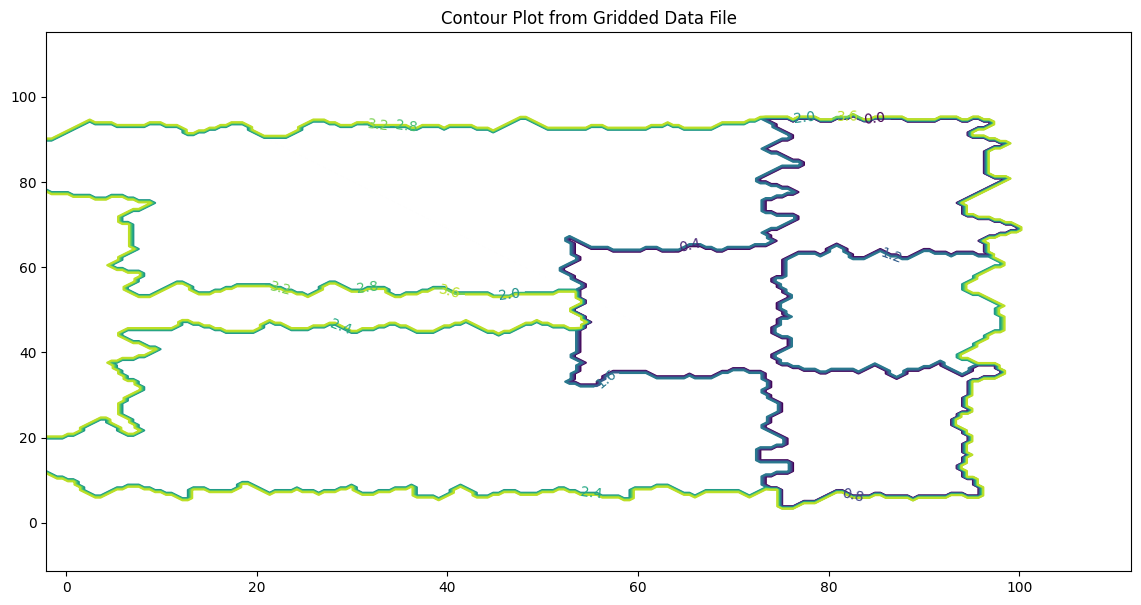

In [43]:
#Step 4: Read and process the file, generate the contour plot
# http://54.243.252.9/engr-1330-webroot/8-Labs/Lab07/Lab07.html
# https://clouds.eos.ubc.ca/~phil/docs/problem_solving/06-Plotting-with-Matplotlib/06.14-Contour-Plots.html
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html
# https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib
# https://stackoverflow.com/questions/18730044/converting-two-lists-into-a-matrix
# https://stackoverflow.com/questions/3242382/interpolation-over-an-irregular-grid
# https://stackoverflow.com/questions/33919875/interpolate-irregular-3d-data-from-a-xyz-file-to-a-regular-grid
import pandas
my_xyz = pandas.read_csv('pip-corner-sumps.txt',sep='\t') # read an ascii file already prepared, delimiter is tabs
my_xyz = pandas.DataFrame(my_xyz) # convert into a data frame
#print(my_xyz) # activate to examine the dataframe
import numpy 
import matplotlib.pyplot
from scipy.interpolate import griddata
# extract lists from the dataframe
coord_x = my_xyz['X-Easting'].values.tolist()
coord_y = my_xyz['Y-Northing'].values.tolist()
coord_z = my_xyz['Z-Elevation'].values.tolist()
coord_xy = numpy.column_stack((coord_x, coord_y))
# Set plotting range in original data units
lon = numpy.linspace(min(coord_x), max(coord_x), 200)
lat = numpy.linspace(min(coord_y), max(coord_y), 200)
X, Y = numpy.meshgrid(lon, lat)
# Grid the data; use linear interpolation (choices are nearest, linear, cubic)
Z = griddata(numpy.array(coord_xy), numpy.array(coord_z), (X, Y), method='nearest')
# Build the map
fig, ax = matplotlib.pyplot.subplots()
fig.set_size_inches(14, 7)
CS = ax.contour(X, Y, Z, levels = 12)
ax.clabel(CS, inline=2, fontsize=10)
ax.set_title('Contour Plot from Gridded Data File')

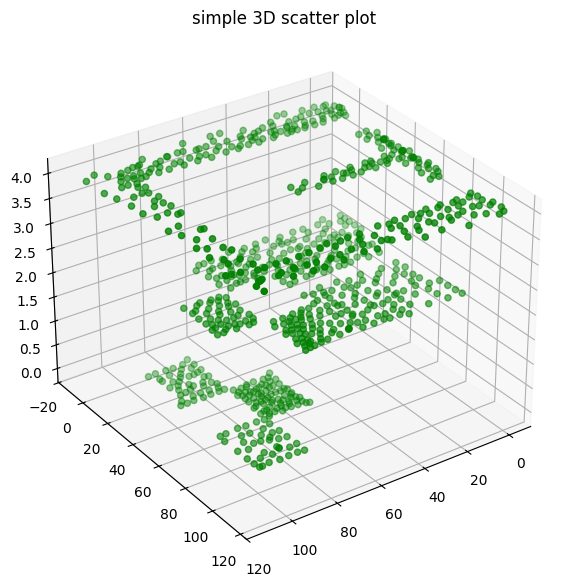

In [44]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt


# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(coord_x, coord_y, coord_z, color = "green")
#ax.scatter3D(x1, y1, z1, color = "red")
plt.title("simple 3D scatter plot")
zangle = 55
ax.view_init(30, zangle)
 
# show plot
plt.show()

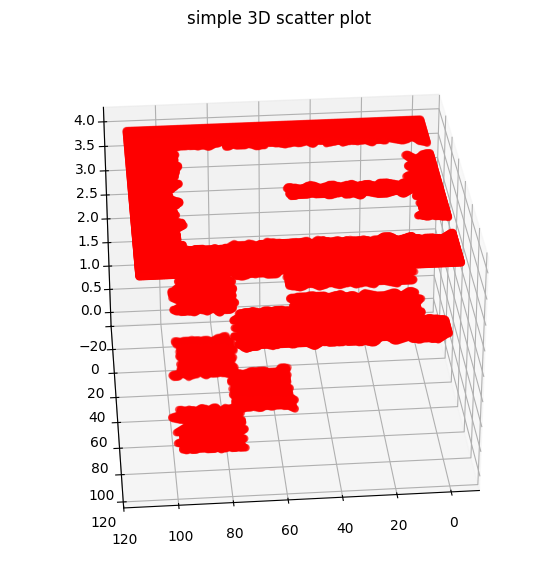

In [45]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
#
model_x = X.tolist()
model_y = Y.tolist()
model_z = Z.tolist()

#coord_x = my_xyz['X-Easting'].values.tolist()
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(model_x, model_y, model_z, color = "red")
#ax.scatter3D(x1, y1, z1, color = "red")
plt.title("simple 3D scatter plot")
zangle = 85
ax.view_init(30, zangle)
 
# show plot
plt.show()

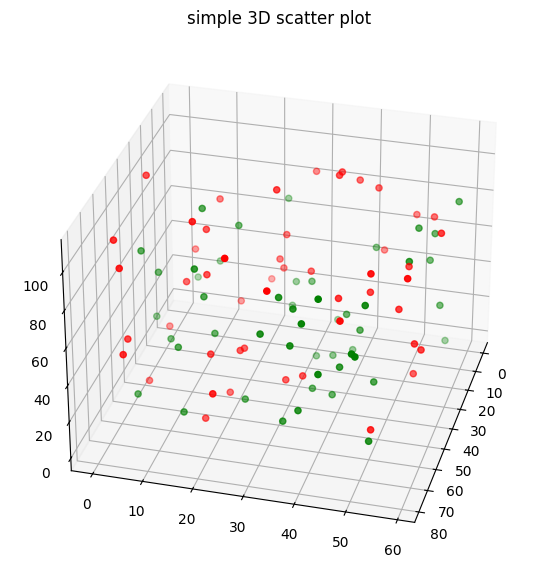

In [46]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
# Create datasets
z = np.random.randint(100, size =(50))
x = np.random.randint(80, size =(50))
y = np.random.randint(60, size =(50))

z1 = np.random.randint(110, size =(50))
x1 = np.random.randint(80, size =(50))
y1 = np.random.randint(60, size =(50))
 
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x, y, z, color = "green")
ax.scatter3D(x1, y1, z1, color = "red")
plt.title("simple 3D scatter plot")
zangle = 15
ax.view_init(30, zangle)
 
# show plot
plt.show()

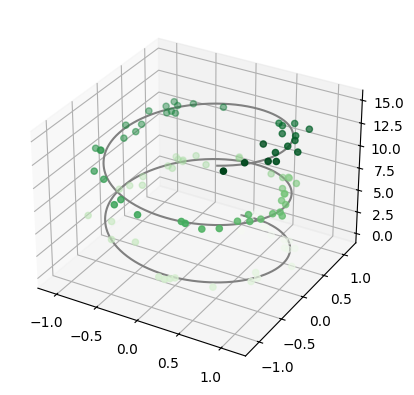

In [47]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


fig = plt.figure()
ax = plt.axes(projection='3d')

#ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');


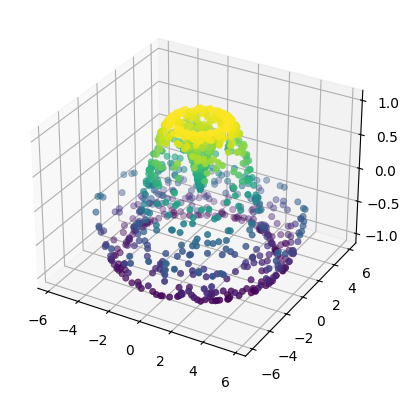

In [48]:


def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)
x = np.ravel(r * np.sin(theta))
y = np.ravel(r * np.cos(theta))
z = f(x, y)



ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z, c=z, cmap='viridis', linewidth=0.5);



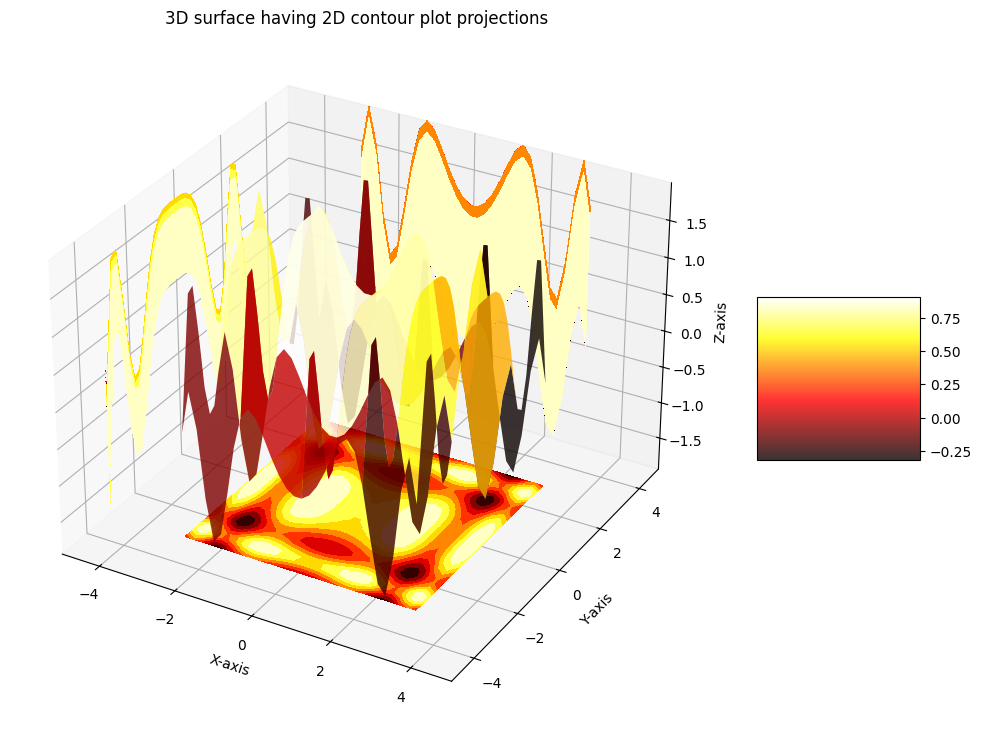

In [49]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
# Creating dataset
x = np.outer(np.linspace(-3, 3, 32), np.ones(32))
y = x.copy().T # transpose
z = (np.sin(x **2) + np.cos(y **2) )
##x = X
##y = Y
##z = Z
 
# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
 
# Creating color map
my_cmap = plt.get_cmap('hot')
 
# Creating plot
surf = ax.plot_surface(x, y, z,
                       rstride = 8,
                       cstride = 8,
                       alpha = 0.8,
                       cmap = my_cmap)
cset = ax.contourf(x, y, z,
                   zdir ='z',
                   offset = np.min(z),
                   cmap = my_cmap)
cset = ax.contourf(x, y, z,
                   zdir ='x',
                   offset =-5,
                   cmap = my_cmap)
cset = ax.contourf(x, y, z,
                   zdir ='y',
                   offset = 5,
                   cmap = my_cmap)
fig.colorbar(surf, ax = ax,
             shrink = 0.5,
             aspect = 1)
 
# Adding labels
ax.set_xlabel('X-axis')
ax.set_xlim(-5, 5)
ax.set_ylabel('Y-axis')
ax.set_ylim(-5, 5)
ax.set_zlabel('Z-axis')
ax.set_zlim(np.min(z), np.max(z))
ax.set_title('3D surface having 2D contour plot projections')
 
# show plot
plt.show()

In [50]:
remote_url="http://54.243.252.9/ce-5319-webroot/ce5319jb/lessons/lesson8/HighestGrossingMovies.csv"  # set the url
response = requests.get(remote_url, allow_redirects=True)                                            # get the remote resource, follow imbedded links
open('HighestGrossingMovies.csv','wb').write(response.content);                                      # extract from the remote the contents, assign to a local file same name

In [51]:
Movies = pandas.read_csv("HighestGrossingMovies.csv")    
Budget = Movies['Budget_million$']
print("Mean Budget $",Budget.mean()," million USD")

Mean Budget $ 115.66  million USD


<Axes: xlabel='day', ylabel='tip'>

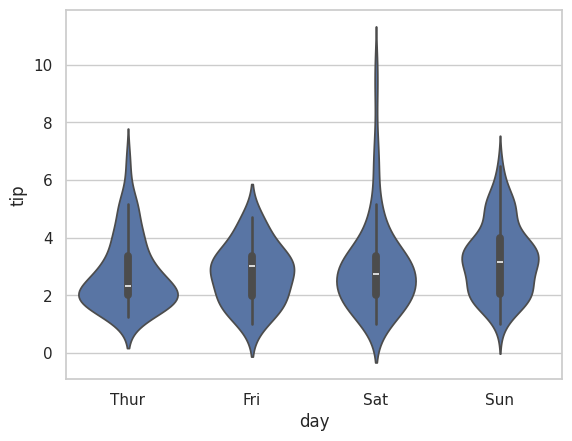

In [52]:
import seaborn
    
    
seaborn.set(style = 'whitegrid') 
tip = seaborn.load_dataset('tips')
  
seaborn.violinplot(x ='day', y ='tip', data = tip)